# Aula 3 - Sistemas Lineares
Muitas equações fundamentais da engenharia são baseadas em leis de conservação, que acopladas podem gerir um conjunto de equações que descrevem um fenômeno. De fato, é quase impossível se deparar com um problema que não possua equações simultâneas a serem calculadas. Estas equações comumente são organizadas em matrizes que chamamos de sistemas lineares:

$$
\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{i1} &        & a_{ii} 
\end{bmatrix}
\begin{bmatrix} 
    x_{1}\\
    \vdots\\
    x_{i} 
\end{bmatrix}
=
\begin{bmatrix} 
    b_{1}\\
    \vdots\\
    b_{i} 
\end{bmatrix}
$$

$$[A]\{x\}=\{b\}$$

Ainda podemos representar o sistema por meio de uma matriz ampliada, que computacionalmente é mais fácil de manipular. Desta forma temos:

$$\left[\begin{array}{rrr|r}
    a_{11} & a_{12} & \dots & b_{1}\\
    \vdots & \ddots &       & \vdots\\
    a_{i1} &        & a_{ii}& b_{i} 
\end{array}\right]
$$

Há vários métodos de resolução desses sistemas e aqui iremos tratar dos seguintes métodos numéricos:
1. Eliminação de Gauss (Método Exato)
2. Gauss-Seidel (Método Iterativo)

## Eliminação de Gauss
É o método mais tradicional de resolução de sistemas de equações. Este consiste de duas partes: a fase de eliminação e a de substituição. Ao final deste método o sistema $[A]\{x\}=\{b\}$ será convertido em $[U]\{x\}=\{c\}$, onde U é a matriz triangular superior, ou seja, todos os valores abaixo da diagonal são zero.

**1. Fase de Eliminação**

Nesta fase, tentamos transformar a matriz $[A]$ em uma matriz triangular superior através de operações sobre as linhas $(A|b)$. Em cada passo usamos como pivô os elementos da diagonal de $[A]$, desde que não seja nulo. Em casos em que o elemento é nulo, podemos permutar (alterar a ordem das equações) as linhas da matriz para prosseguir com o cálculo.

Em cada iteração do método, eliminamos um termo abaixo do elemento da diagonal $a_{kk}$ (eg., na primeira iteração eliminamos a primeira variavel, na segunda a segunda, ...), subtraindo cada linha da matriz $(A|b)$, pela sua anterior. A linha anterior é multiplicada por um fator que é calcululado para que os termos da variável em questão seja cancelado. Em outras palavras temos os seguinte:

$$Eq.(i) \leftarrow Eq.(i) - m_{ij} \times Eq.(j)$$

$$m_{ij}=\frac{a_{ij}}{a_{jj}}$$

Após o término deste processo, temos uma matriz triangular superior que utilizaremos para fazer a fase de substituição.

**2. Fase de Substituição**

As variáveis desconhecidas podem ser calculadas através de uma substituição retroativa.

$$ \begin{cases} 
a^{(1)}_{11}x_1 + a^{(1)}_{12}x_2 + a^{(1)}_{13}x_2 + \cdots + a^{(1)}_{1n}x_n = b^{(1)}_1\\ 
\hspace{65px}     a^{(2)}_{22}x_2 + a^{(2)}_{23}x_2 + \cdots + a^{(2)}_{2n}x_n = b^{(2)}_2\\ 
\hspace{65px}     \hspace{65px}     a^{(3)}_{33}x_2 + \cdots + a^{(3)}_{3n}x_n = b^{(3)}_3\\ 
\hspace{65px}     \hspace{65px}      \hspace{65px}     \hspace{45px}      \vdots   \\
\hspace{65px}     \hspace{65px}      \hspace{65px}     \hspace{45px}  a^{(n)}_{nn}x_n = b^{(n)}_n\\ 
\end{cases} $$

Vamos então resolver um problema de engenharia com a eliminação de gauss.

## Deformação de Estruturas
A deformação de uma estrutura é similar ao sistema massa-mola. As diferenças são:
1. A rigidez dos membros é dada por $k_i=(EA/L)_i$; onde $E$ é o módulo de elasticidade, $A$ representa a área da seção transversal e $L$ é o comprimento do membro
2. Há dois componentes de deformação para cada nó (Se a treliça for planar).

<center><img src="img/trelica.png"></center>

Se o deslocamento da treliça estáticamente indeterminada mostrada  resulta em um sistema simétrico de equações $K u = p$, sendo $K$ em MN/m e $p$ em kN:

$$\begin{bmatrix}
27.58 & 7.004 & -7.004 & 0 & 0 \\
7.004 & 29.57 & -5.253 & 0 & -24.32 \\
-7.004 & -5.253 & 29.57 & 0 & 0 \\
0 & 0 & 0 & 27.58 & -7.004 \\
0 & -24.32 & 0 & -7.004 & 29.57
\end{bmatrix}
\begin{Bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \\
\end{Bmatrix}
=
\begin{Bmatrix}
0 \\
0 \\
0 \\
0 \\
-45
\end{Bmatrix}$$

Em python o processo de implementação é o seguinte:
1. Importar as Bibliotecas Necessárias
2. Definir a Função de Triangularização da Matriz (Fase de Eliminação)
3. Definir a Função de Substituição
4. Definir a Função que Imprime os Resultados

### Bibliotecas Necessárias

In [ ]:
import numpy as np #Biblioteca Numpy

### Função de Triangularização

In [ ]:
def triangularizacao(M):
    """
    Utilização:
    a = triangularizacao(M)
    
    M - É a matriz aumentada (A|b)
    
    Faz a triangularização superior de uma matriz aumentada (A|b) utilizando o método de eliminação de gauss.
    """
    n = len(M)
    for j in range(n-1):
        for i in range(j,n-1): #Loop das Linhas que faltam, logo da posição J à n-1
            m = M[i+1,j]/M[j,j] # Calculo do pivô (Fator de Eliminação)
            M[i+1] = M[i+1]-m*M[j] # Eq.(i) <-- Eq.(i) - m * Eq.(j)
    return (M)

Para utilizar essa função vamos então declarar a matriz aumentada $(A|b)$ que rege nosso problema:

In [ ]:
a = np.array([[27.58 , 7.004 , -7.004 , 0 , 0 , 0],
            [7.004 , 29.57 , -5.253 , 0 , -24.32, 0 ],
            [-7.004 , -5.253 , 29.57 , 0 , 0, 0 ],
            [0 , 0 , 0 , 27.58 , -7.004, 0 ],
            [0 , -24.32 , 0 , -7.004 , 29.57, -45 ]])
print(a)

Vamos agora triangularizar a matriz:

In [ ]:
a = triangularizacao(a)
print(a)

Podemos agora dividir a matriz aumentada em duas, voltando a um conjunto $[A]\{x\}=\{b\}$

In [ ]:
n = len(a)  
A = a[0:n+1,0:n]
b = a[0:n+1,n:n+1]

print(np.round(A,4))
print(np.round(b,4))

### Função de Substituição

In [ ]:
def substituicao(U, y):
    """
    Utilização:
    resultado = substituicao(U,y)
    
    U - Matriz triangular superior
    y - Vetor de resposta
    
    Faz a susbstituição reversa de um sistema de matrizes no formato Ux=y em que U é a matriz triangular superior.
    """
    
    n = len(U)-1       # Como os resultados não utilizam a última linha, os indices correm de 0 até n-1
    xn = y[n]/U[n][n]  # Calcula o resultado da ultima posição

    x = [0]*len(U)     # Cria um vetor de zeros    
    x[-1] = xn         # Atribui o valor da ultima variável (xn) na ultima posição da "lista" x
    
    for i in range(n-1,-1,-1):
        soma = 0
        for j in range(i+1,n+1):
            soma +=  U[i][j]*x[j]
        xi = (y[i]-soma)/U[i][i]
        x[i] = xi
    return x

resultado = substituicao(A, b)

### Função que Imprime os Resultados

In [ ]:
def imprimeResultadosEstrutura(x):
    for i in range(len(x)):
        print("u{} = {:.3g} mm".format(i+1, float(x[i])))

imprimeResultadosEstrutura(resultado)

### Solver da biblioteca Numpy (numpy.linalg.solve)
Este módulo da biblioteca Numpy nos permite calcular qualquer equação linear ou sistema de equações em apenas uma linha.

Documentação: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

Como exemplo, vamos recalcular este ultimo exercício de deformação de estruturas:

In [ ]:
# Cálculo utilizando a função linalg.solve() do módulo numpy
x = np.linalg.solve(A,b)
# Impressão dos resultados do sistema linear
imprimeResultadosEstrutura(x)

## Gauss-Seidel

Este método faz parte de uma outra família de métodos de resolução linear, os métodos iterativos. Enquanto o método anterior tem um resultado direto, este precisa de alguma iterações para ser calculado. Este procedimento iterativo nos dá duas vantagens principais:

1. É possível armazenar apenas valores diferentes de zero na matriz de coeficientes. Isso faz com que possamos lidar com matrizes muito grandes que são esparsas.
2. Procedimentos iterativos são auto-corrigidos, o que nos permite dizer que erros de arredondamento são corrigidos nas iterações subsequentes.

Entretanto, sabemos que métodos iterativos nem sempre convergem. Neste método, o valor inicial não define sua a convergência.

Sobre o método, se considerarmos um sistema de equações lineares $[A]\{x\}=\{b\}$ em que $det(A) \neq 0$, com a diagonal principal não nula. Ainda que as equações sejam nomeadas de $x_1, x_2, ..., x_i$, podemos calcular o valor dessa equação na forma:

$$
x_i=\frac{1}{a_{ii}}\left (b_i - \sum_{j = 1, j \neq i}^{n,m} a_{ij}x_j \right ), i=1,2,...,n
$$

Em termos de uma matriz 3x3 qualquer teriamos as seguintes equações:

$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}\\
\end{bmatrix}
\begin{Bmatrix}
x_1\\ 
x_2\\ 
x_3
\end{Bmatrix}
=
\begin{Bmatrix}
b_1\\ 
b_2\\ 
b_3
\end{Bmatrix}
$$
$$
x_1 = \frac{1}{a_{11}} \left ( b_1 - a_{12}x_2 - a_{13}x_3 \right)
$$
$$
x_2 = \frac{1}{a_{22}} \left ( b_2 - a_{21}x_1 - a_{23}x_3 \right)
$$
$$
x_3 = \frac{1}{a_{33}} \left ( b_3 - a_{31}x_1 - a_{32}x_2 \right)
$$

A solução se inicia com um chute dos valores do vetor x, uma forma fácil de inicializar o vetor é assumir os valores iniciais como zero. Aplicando então na primeira equação temos $x_1=b_1/a_{11}$, este valor calculado de $x_1$ é utilizado para calcular a equação de $x_2$ que após ser evaluada será utilizada para calcular $x_3$ e assim sucessivamente:

$$
x_1 = \frac{1}{a_{11}} \left ( b_1 - a_{12}(0) - a_{13}(0) \right) = \frac{b_1}{a_{11}}
$$
$$
x_2 = \frac{1}{a_{22}} \left ( b_2 - a_{21}\left(\frac{b_1}{a_{11}}\right) - a_{23}(0) \right) = \frac{b_2 - a_{21}\left(\frac{b_1}{a_{11}}\right)}{a_{22}}
$$
$$
x_3 = \frac{1}{a_{33}} \left ( b_3 - a_{31}\left(\frac{b_1}{a_{11}}\right) - a_{32}\left(\frac{b_2 - a_{21}\left(\frac{b_1}{a_{11}}\right)}{a_{22}} \right) \right)
$$
$$
\vdots \\
x_1 =  \frac{1}{a_{11}} \left ( b_1 - a_{12}\dots \right)
$$

Vamos então resolver um problema de engenharia com este método:

### Lei de Kirchhoff
A soma algébrica da d.d.p (Diferença de Potencial Elétrico) em um percurso fechado é nula.

$$\sum_{i=1}^{n} U_i =0$$

Também, Em um nó, a soma das correntes elétricas que entram é igual à soma das correntes que saem, ou seja, um nó não acumula carga.

$$\sum_{i=1}^{n} i_i =0$$

---
A aplicação destas duas leis em circuito facilita a sua formulação em forma de um sistema linear de *n* equações quando *n* variáveis existem.

### Exemplo
<center><img src="img/circuito.png"></center>

O circuito acima pode ser visto em três loops, aplicando a Lei de Kirchhoff temos:

$$\begin{matrix}
(50+R)i_1 - R i_2 - 30 i_3 = 0  & \\ 
-R i_1 + (65 + R)i_2 -15 i_3 = 0 & \\ 
-30 i_2 - 15 i_2 + 45 i_3 = 120 &
\end{matrix}$$

Se considerarmos as resistências iguais a $R_i = 20 \Omega$, respectivamente, qual o valor das correntes?

### Resolução
Este problema pode ser visto no seguinte formato matricial:

$$\begin{matrix}
(50+20)i_1 - 20 i_2 - 30 i_3 = 0 \\ 
-20 i_1 + (65 + 20)i_2 -15 i_3 = 0 \\ 
-45 i_2 + 45 i_3 = 120
\end{matrix}$$

Convertendo para o formato $A\times x = b$ temos:

$$\begin{bmatrix}
70 & - 20 & - 30 \\ 
-20 & + 85 & - 15 \\ 
0 & - 45 & + 45
\end{bmatrix}
\begin{Bmatrix}
i_1\\ 
i_2\\ 
i_3
\end{Bmatrix}
=
\begin{Bmatrix}
0\\ 
0\\ 
120
\end{Bmatrix}$$

Em python o processo de implementação é o seguinte:
1. Importar as Bibliotecas Necessárias
2. Definir a Função de Gauss-Seidel
3. Definir a Função que Imprime os Resultados

### Bibliotecas Necessárias

In [ ]:
import math
import numpy as np

### Definição da Função Gauss-Seidel

In [ ]:
def gaussSeidel(A, b, tol):
    """
    x = gaussSeidel(A, b, tol)
    
    A - Matriz de coeficientes
    b - Vetor de respostas
    tol - Erro tolerado
    
    Função que calcula o método de Gauss-Seidel para resolver um sistema [A]{x}={b}.
    Todos os valores são iniciados com x = 0
    """
    
    n = len(A)
    x = np.zeros_like(b, dtype=np.double)
    print("Iteração | x | Erro")
    for it in range(1, 501): # 500 iterações
        xAnt = x.copy()
        
        for i in range(n): # Loop pelas linhas
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], xAnt[(i+1):])) / A[i ,i]
            
        # Condição de Parada
        erro = np.linalg.norm(x - xAnt, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
            ## np.linalg.norm - Calcula a norma de uma matriz ou vetor
                ## A opção inf calcula: max(sum(abs(x), axis=1))
                ## Veja mais em https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
            ## np.dot - Faz o produto escalar entre dois arrays de entrada
            ## math.sqrt - Faz o cálculo da raiz quadrada de um valor
        print(it,x,erro)
        if erro < tol:
            return x
    print("O método de Gauss-Seidel não convergiu")

Vamos definir as equações de nosso sistema:

In [ ]:
a = np.array([[70, -20, -30],
              [-20, 85, -15],
              [0, -45, 45]])
b = np.array([0, 0, 120])

print("Matrix de Variáveis A:\n{}\n".format(a))
print("Vetor de Resultados B:\n{}".format(b))

### Função que Imprime os Resultados

In [ ]:
def imprimeResultados(x):
    for i in range(len(x)):
        print("I{} = {:.3g} A".format(i+1, float(x[i])))

res = gaussSeidel(a,b, 1e-6)
imprimeResultados(res)

# Exercícios

**Confira os resultados de seus programas usando a função np.linalg.solve**

1. Esforço em Treliças

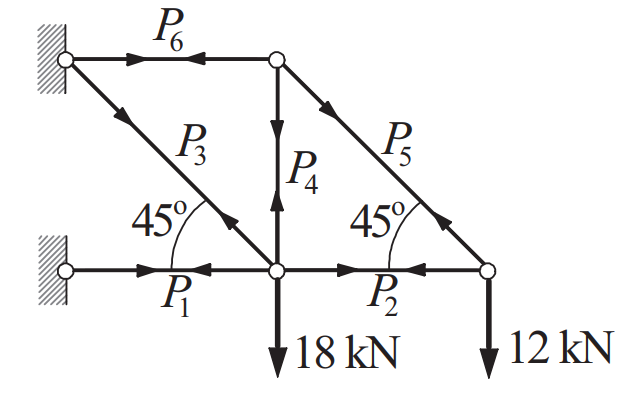

Na formulação de força de uma treliça, as variáveis são as forças em cada membro $P_i$. Para a treliça estaticamente determinada nmostrada, as forças são obtidas através do seguinte sistema de equilíbrio dos nós:

$\begin{bmatrix}
-1 & 1 & -1/\sqrt{2} & 0 & 0 & 0 \\
0 & 0 & 1/\sqrt{2} & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -1/\sqrt{2} & 0 \\
0 & 0 & 0 & 0 & 1/\sqrt{2} & 0 \\
0 & 0 & 0 & 0 & 1/\sqrt{2} & 1 \\
0 & 0 & 0 & 1 & -1/\sqrt{2} & 0 \\
\end{bmatrix}
\begin{Bmatrix}
P_1 \\
P_2 \\
P_3 \\
P_4 \\
P_5 \\
P_6 \\
\end{Bmatrix}
=
\begin{Bmatrix}
0 \\
18 \\
0 \\
12 \\
0 \\
0 \\
\end{Bmatrix}$

Agora é a sua vez! Escreva os próximos passos para a resolução do sistema linear com base em um dos métodos mostrados hoje:

In [ ]:
def imprimeResultadosForcas(x):
    for i in range(len(x)):
        print("P{} = {:.3g} kN".format(i+1, float(x[i])))
 


2. Treliça Genérica

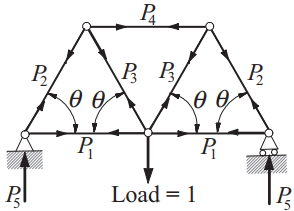

A formulação de força da treliça simétrica acima resulta no seguinte sistema de equações:

$\begin{bmatrix}
c & 1 & 0 & 0 & 0 \\
0 & s & 0 & 0 & 0 \\
0 & 0 & 2s & 0 & 0 \\
0 & -c & c & 1 & 0 \\
0 & s & s & 0 & 0 \\
\end{bmatrix}
\begin{Bmatrix}
P_1 \\
P_2 \\
P_3 \\
P_4 \\
P_5
\end{Bmatrix}
=
\begin{Bmatrix}
0 \\
0 \\
1 \\
0 \\
0
\end{Bmatrix}$

onde $s=sen(\theta)$, $c=cos(\theta)$ e $P_i$ são as forças desconhecidas. Escreva um código que dado um ângulo $\theta$ calcule as forças da treliça. Para verificação utilize o ângulo $\theta = 45^{\circ}$.

In [ ]:
def matriz(ang):
    ang = np.radians(ang) # Converte o angulo de graus para radianos
    s = np.sin(ang) # Calcula o seno
    c = np.cos(ang) # Calcula o cosseno
    a = np.array([[c , 1 , 0 , 0 , 0 ],
                [0 , s , 0 , 0 , 0 ],
                [0 , 0 , 2*s , 0 , 0 ],
                [0 , -c , c , 1 , 0 ],
                [0 , s , s , 0 , 0]])
    b = np.array([0, 0, 1, 0 , 0]).reshape(5,1)
    return a,b

a, b = matriz(45);

print("Matrix de Variáveis A:\n{}\n".format(a))
print("Vetor de Resultados B:\n{}".format(b))